In [1]:
import embeddings
import custom_tools

# Read json file
job_id = "VojrEHdFRPUTsJ3zGTiPcQ"
args  = custom_tools.load_json(f"../models/selected_models/{job_id}.json")
args["num_node_features"] = 33
deg = custom_tools.load_pickle(f"../models/selected_models/{job_id}_deg.pckl")
model = custom_tools.load_model(f"{job_id}_SD", path = "../models/selected_models", model_type = "SD", args = args, deg=deg)

print(model)

Global seed set to 42


CPU is available on this device!
CustomGCN(
  (convs): ModuleList(
    (0): PNAConv(33, 32, towers=1, edge_dim=None)
    (1-2): 2 x PNAConv(32, 32, towers=1, edge_dim=None)
  )
  (batch_norms): ModuleList(
    (0-2): 3 x BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (ff_layers): ModuleList(
    (0): Linear(in_features=32, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=1, bias=True)
  )
  (ff_batch_norms): ModuleList(
    (0): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
)


In [2]:
from dataset import TissueDataset
import os

dataset = TissueDataset(os.path.join("../data/JacksonFischer", "month"),  "month")

Global seed set to 42


Target prediction: OSmonth


In [3]:
emd, related_data = embeddings.get_intermediate_embeddings_for_dataset(model, dataset, batch_size=1)

In [4]:
emd512 = emd[0]


In [5]:
emd512.shape

torch.Size([752, 512])

/opt/homebrew/Caskroom/miniconda/base/envs/COPred_2/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/homebrew/Caskroom/miniconda/base/envs/COPred_2/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/homebrew/Caskroom/miniconda/bas

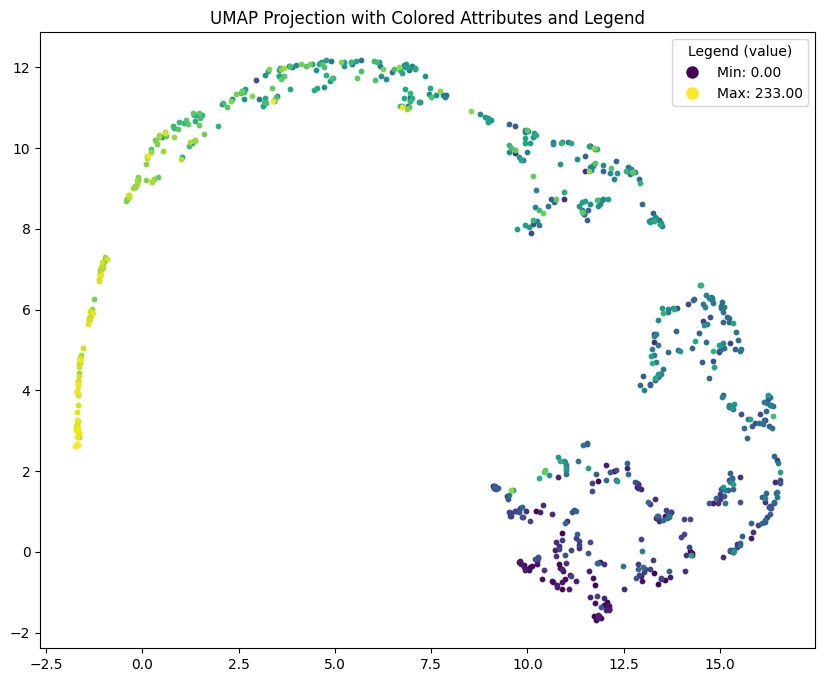

In [6]:
import plotting

plotting.UMAP_plot(emd512, related_data, 'osmonth')


In [7]:

emd_mp, related_data_mp = embeddings.get_intermediate_embeddings_for_dataset(model, dataset, batch_size=1, mode="CNV")

In [8]:
len(emd_mp)

3

In [9]:
MS_L0 = emd_mp[0]
MS_L1 = emd_mp[1]
MS_L2 = emd_mp[2]

In [10]:
# Get mean of the columns for MS_LX
MS_L2.shape

torch.Size([752, 32])

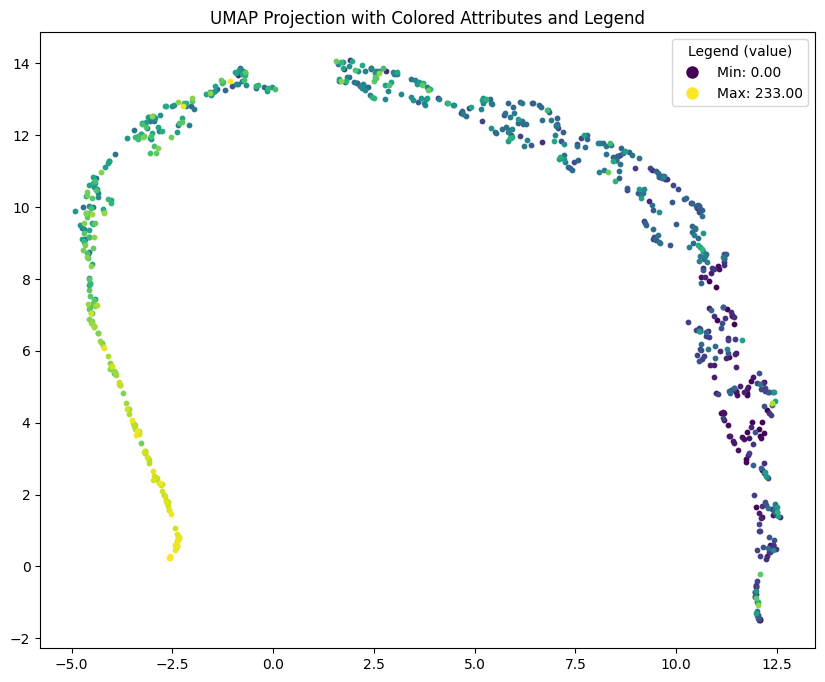

In [11]:
import plotting

plotting.UMAP_plot(MS_L2, related_data_mp, 'osmonth')


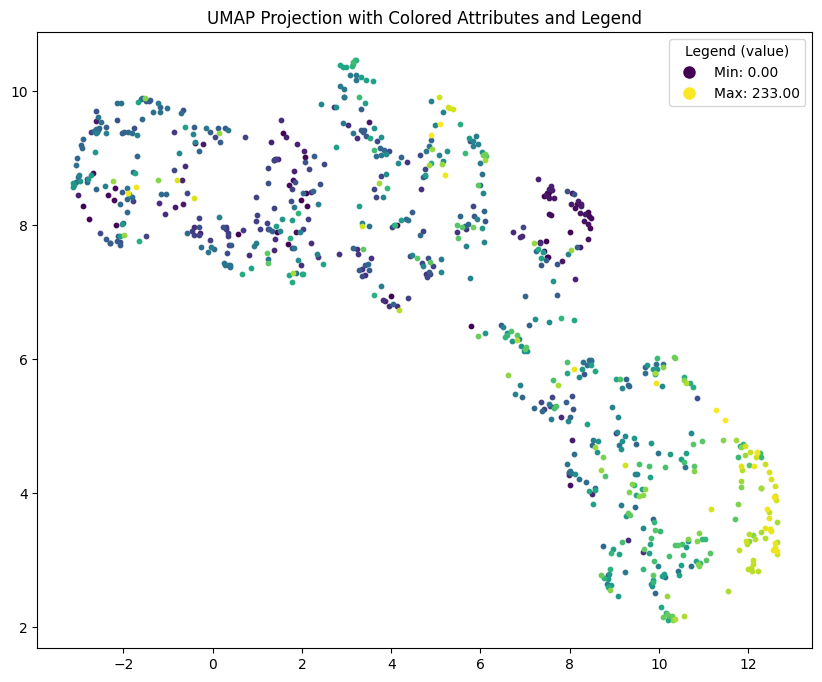

In [14]:
plotting.UMAP_plot(MS_L1, related_data_mp, 'osmonth')

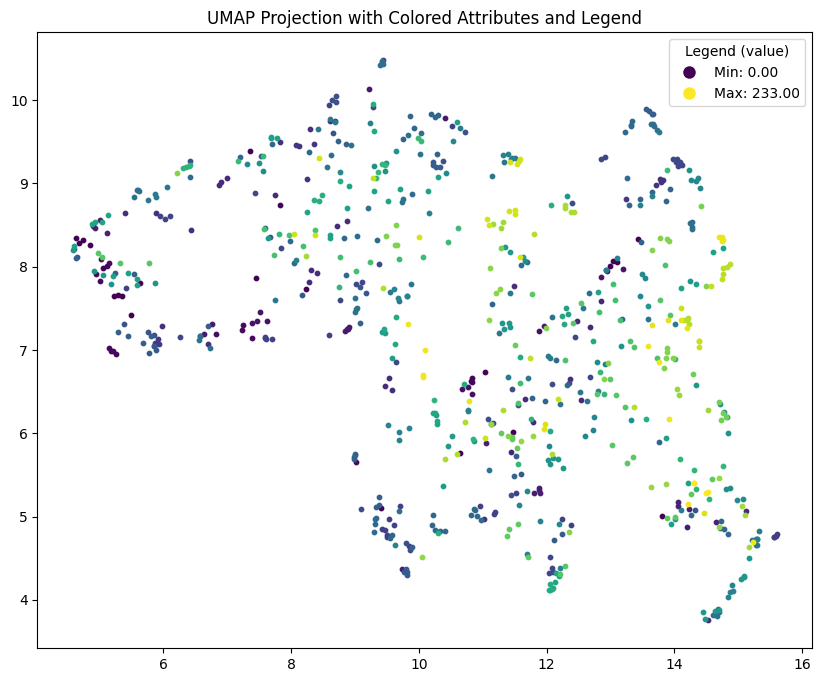

In [15]:
plotting.UMAP_plot(MS_L0, related_data_mp, 'osmonth')

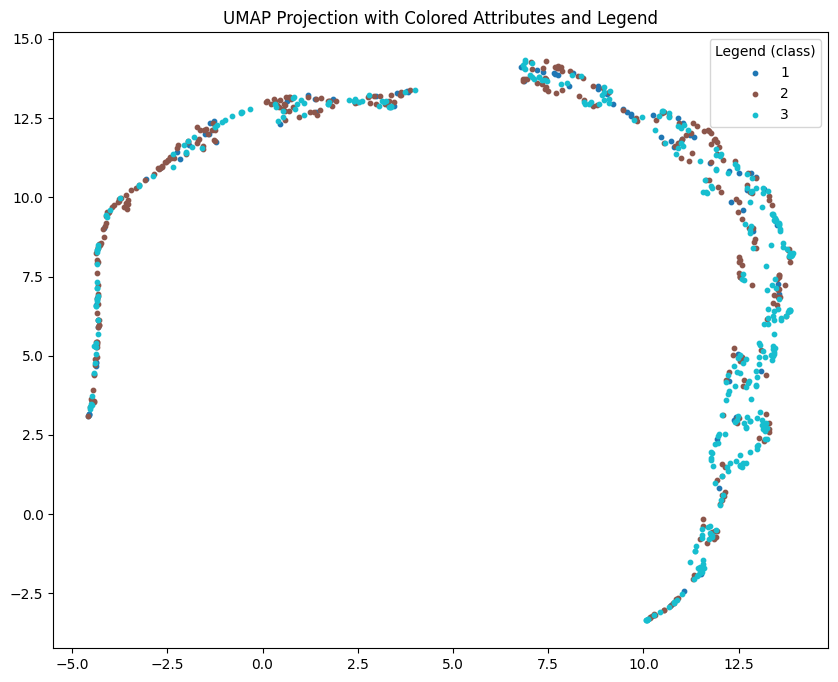

In [16]:
plotting.UMAP_plot(MS_L2, related_data_mp, 'tumor_grade')

In [12]:
# Loop over related_data and print related_data[i].osmonth

for i in range(len(related_data)):
    print(related_data[i].osmonth)

tensor([109.], dtype=torch.float64)
tensor([58.], dtype=torch.float64)
tensor([121.], dtype=torch.float64)
tensor([3.], dtype=torch.float64)
tensor([54.], dtype=torch.float64)
tensor([78.], dtype=torch.float64)
tensor([53.], dtype=torch.float64)
tensor([122.], dtype=torch.float64)
tensor([47.], dtype=torch.float64)
tensor([54.], dtype=torch.float64)
tensor([121.], dtype=torch.float64)
tensor([88.], dtype=torch.float64)
tensor([2.], dtype=torch.float64)
tensor([128.], dtype=torch.float64)
tensor([7.], dtype=torch.float64)
tensor([81.], dtype=torch.float64)
tensor([75.], dtype=torch.float64)
tensor([77.], dtype=torch.float64)
tensor([42.], dtype=torch.float64)
tensor([12.], dtype=torch.float64)
tensor([186.], dtype=torch.float64)
tensor([88.], dtype=torch.float64)
tensor([65.], dtype=torch.float64)
tensor([167.], dtype=torch.float64)
tensor([195.], dtype=torch.float64)
tensor([233.], dtype=torch.float64)
tensor([59.], dtype=torch.float64)
tensor([44.], dtype=torch.float64)
tensor([53.], 

In [13]:
%%script false
import torch
import umap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Assuming you have a list of DataBatch objects named 'related_data'
# Each DataBatch object has an attribute 'clinical_type' representing the label
# You also have an embeddings tensor named 'emd512'

# Convert the embeddings tensor to a numpy array
emd_array = emd512.numpy()

# Extract the labels from the related_data list
labels = [data_batch.clinical_type[0] for data_batch in related_data]

# Get unique labels and create a colormap
unique_labels = list(set(labels))
num_labels = len(unique_labels)
color_map = plt.get_cmap('viridis', num_labels)
label_color = {label: color_map(i) for i, label in enumerate(unique_labels)}

# Convert labels to colors based on the colormap
label_colors = [label_color[label] for label in labels]

# Create a UMAP reducer
reducer = umap.UMAP()

# Apply UMAP transformation
umap_result = reducer.fit_transform(emd_array)

# Plot the UMAP results with colored labels and legend
plt.figure(figsize=(10, 8))

# Create scatter plot for each label with corresponding color
for label, color in label_color.items():
    mask = np.array(labels) == label
    plt.scatter(umap_result[mask, 0], umap_result[mask, 1], c=[color], label=label, s=10)

# Add legend
plt.legend()

plt.title('UMAP Projection with Colored Labels and Legend')
plt.show()


CalledProcessError: Command 'b"import torch\nimport umap\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom matplotlib.colors import ListedColormap\n\n# Assuming you have a list of DataBatch objects named 'related_data'\n# Each DataBatch object has an attribute 'clinical_type' representing the label\n# You also have an embeddings tensor named 'emd512'\n\n# Convert the embeddings tensor to a numpy array\nemd_array = emd512.numpy()\n\n# Extract the labels from the related_data list\nlabels = [data_batch.clinical_type[0] for data_batch in related_data]\n\n# Get unique labels and create a colormap\nunique_labels = list(set(labels))\nnum_labels = len(unique_labels)\ncolor_map = plt.get_cmap('viridis', num_labels)\nlabel_color = {label: color_map(i) for i, label in enumerate(unique_labels)}\n\n# Convert labels to colors based on the colormap\nlabel_colors = [label_color[label] for label in labels]\n\n# Create a UMAP reducer\nreducer = umap.UMAP()\n\n# Apply UMAP transformation\numap_result = reducer.fit_transform(emd_array)\n\n# Plot the UMAP results with colored labels and legend\nplt.figure(figsize=(10, 8))\n\n# Create scatter plot for each label with corresponding color\nfor label, color in label_color.items():\n    mask = np.array(labels) == label\n    plt.scatter(umap_result[mask, 0], umap_result[mask, 1], c=[color], label=label, s=10)\n\n# Add legend\nplt.legend()\n\nplt.title('UMAP Projection with Colored Labels and Legend')\nplt.show()\n"' returned non-zero exit status 1.

In [ ]:
%%script false
import torch
import umap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Assuming you have a list of DataBatch objects named 'related_data'
# Each DataBatch object has an attribute 'clinical_type' representing the label
# You also have an embeddings tensor named 'emd512'

# Convert the embeddings tensor to a numpy array
emd_array = emd512.numpy()

# Extract the labels from the related_data list
labels = [data_batch.clinical_type[0] for data_batch in related_data]

# Get unique labels and create a colormap
unique_labels = list(set(labels))
num_labels = len(unique_labels)
color_map = plt.get_cmap('viridis', num_labels)
label_color = {label: color_map(i) for i, label in enumerate(unique_labels)}

# Convert labels to colors based on the colormap
label_colors = [label_color[label] for label in labels]

# Create a UMAP reducer
reducer = umap.UMAP()

# Apply UMAP transformation
umap_result = reducer.fit_transform(emd_array)

# Set up Seaborn with the color palette
sns.set(style="whitegrid", palette=label_colors)

# Create the scatter plot using Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], hue=labels, s=10, legend="full")

# Customize the legend
plt.legend(title="Clinical Type", loc="upper right")

plt.title('UMAP Projection with Colored Labels and Legend (using Seaborn)')
plt.show()


CalledProcessError: Command 'b'import torch\nimport umap\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nfrom matplotlib.colors import ListedColormap\n\n# Assuming you have a list of DataBatch objects named \'related_data\'\n# Each DataBatch object has an attribute \'clinical_type\' representing the label\n# You also have an embeddings tensor named \'emd512\'\n\n# Convert the embeddings tensor to a numpy array\nemd_array = emd512.numpy()\n\n# Extract the labels from the related_data list\nlabels = [data_batch.clinical_type[0] for data_batch in related_data]\n\n# Get unique labels and create a colormap\nunique_labels = list(set(labels))\nnum_labels = len(unique_labels)\ncolor_map = plt.get_cmap(\'viridis\', num_labels)\nlabel_color = {label: color_map(i) for i, label in enumerate(unique_labels)}\n\n# Convert labels to colors based on the colormap\nlabel_colors = [label_color[label] for label in labels]\n\n# Create a UMAP reducer\nreducer = umap.UMAP()\n\n# Apply UMAP transformation\numap_result = reducer.fit_transform(emd_array)\n\n# Set up Seaborn with the color palette\nsns.set(style="whitegrid", palette=label_colors)\n\n# Create the scatter plot using Seaborn\nplt.figure(figsize=(10, 8))\nsns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], hue=labels, s=10, legend="full")\n\n# Customize the legend\nplt.legend(title="Clinical Type", loc="upper right")\n\nplt.title(\'UMAP Projection with Colored Labels and Legend (using Seaborn)\')\nplt.show()\n'' returned non-zero exit status 1.

In [ ]:
related_data[0
             ]

DataBatch(x=[2164, 33], edge_index=[2, 12616], y=[1], pos=[2164, 2], osmonth=[1], clinical_type=[1], treatment=[1], disease_stage=[1], tumor_grade=[1], img_id=[1], p_id=[1], age=[1], disease_status=[1], dfs_month=[1], batch=[2164], ptr=[2])